# Dogs vs Cats Classification using Convolutional Neural   Network

###  taken from  from https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c02_dogs_vs_cats_with_augmentation.ipynb

## STEP 1:  Installing packages

In [1]:
# STEP 1:  Install packages in the current environment
import sys
!{sys.executable} -m pip install opencv-python 
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install scikit-learn

## STEP 2:  Importing our dependencies

In [2]:
import tensorflow as tf
import os
import cv2
import numpy as np
#import matplotlib.pyplot as plt
#import tqdm
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#print out version of tensorflow using
print(tf.version.VERSION)

2.0.0


## STEP 3:Define some variables - location of data, BATCH_SIZE, IMG_SHAPE

In [9]:
BASE_DIRECTORY ='/Users/bhumitpatel/Downloads/Train/'

base_dir = os.path.join(os.path.dirname(BASE_DIRECTORY), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
%ls {base_dir}

BATCH_SIZE = 100
IMG_SHAPE  = 150 

train/        validation/   vectorize.py


In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [11]:
print(train_cats_dir)
print(train_dogs_dir)
print(validation_cats_dir)

/Users/bhumitpatel/Downloads/Train/cats_and_dogs_filtered/train/cats
/Users/bhumitpatel/Downloads/Train/cats_and_dogs_filtered/train/dogs
/Users/bhumitpatel/Downloads/Train/cats_and_dogs_filtered/validation/cats


## Info 1: calculate the number of samples --not necessary --just information

In [12]:
#show number of samples
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print("total training samples = " +str(total_train))
print("total validation samples = " + str(total_val))

total training samples = 2000
total validation samples = 1000


## Info 2: Show how data Augmetnation can work and setup function to plotImages 

### function to display some of the image data --not necessary but nice

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

# ****Data Augmentation to add more samples then we have****

### augmentation through horizontal flip

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


#### display an image to see 5 of the created augemented images

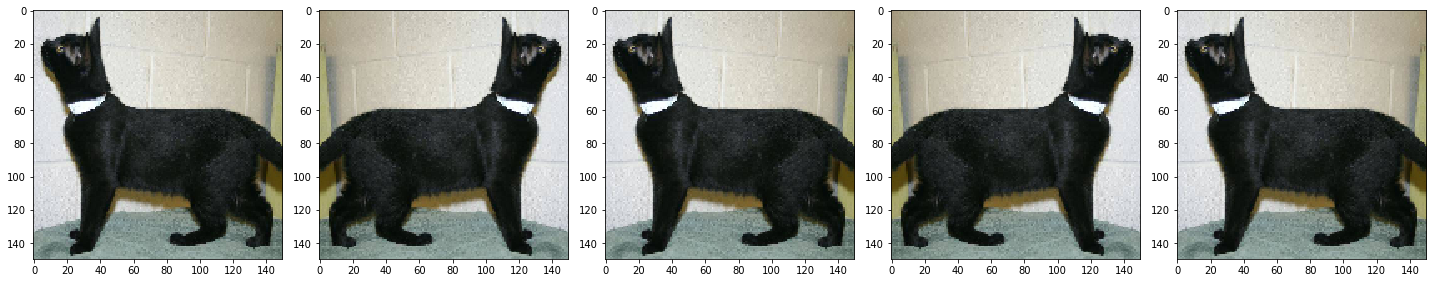

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### augmentation through rotation

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


#### display 5 of created augmented images

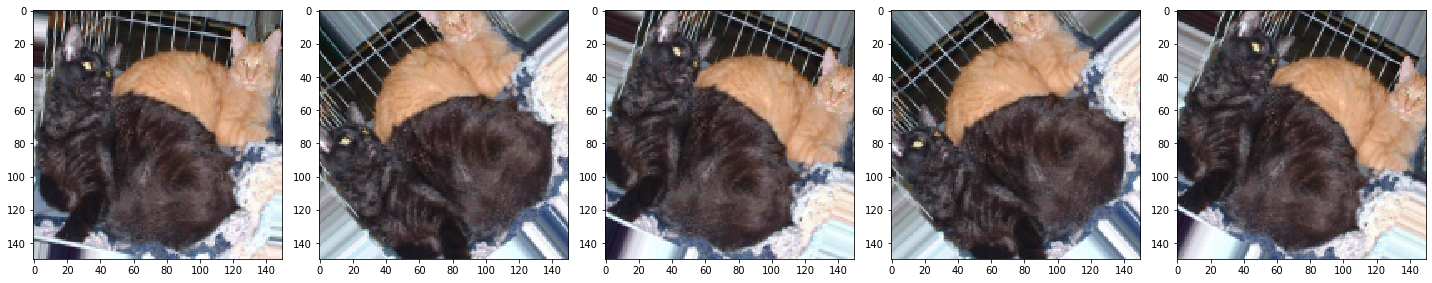

In [17]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### autmentation through zoom

In [18]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))


Found 2000 images belonging to 2 classes.


#### display 5 zoomed augmented images

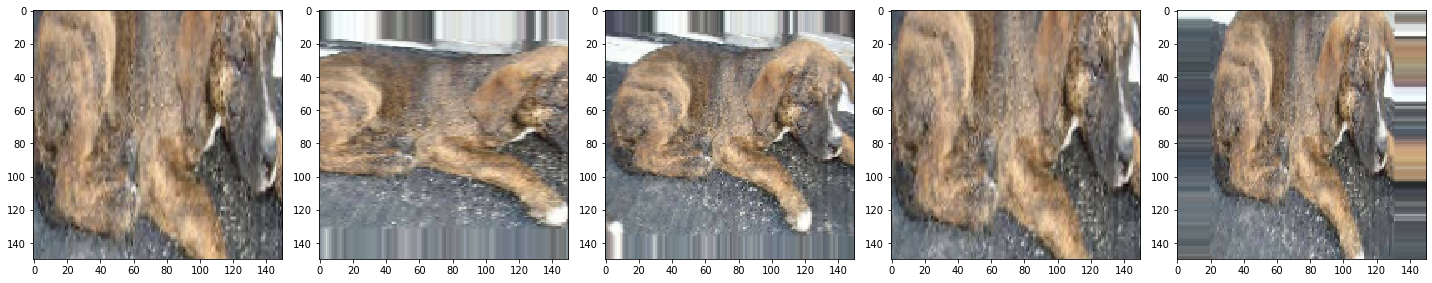

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## STEP 4:  Load Training Data and perform Augment data set by horizontal flip, rotation, rescale, translation, etc.

In [20]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


#### not necessary but show 5 of the newly created augmented images

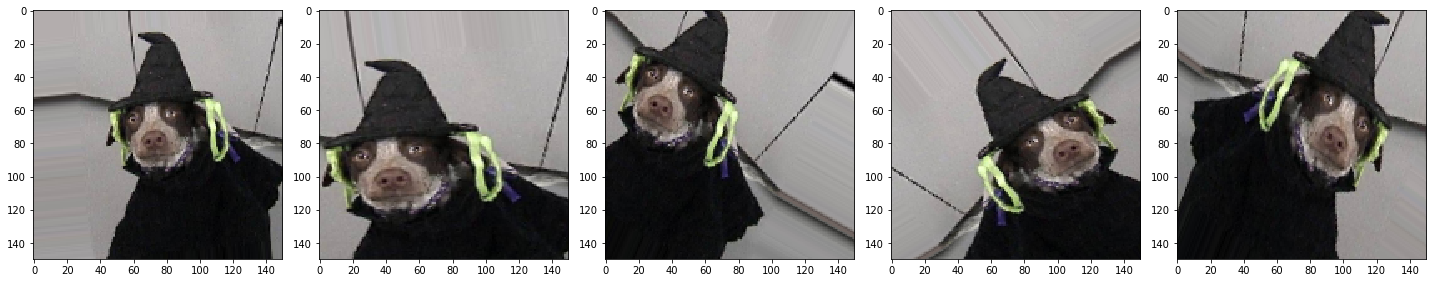

In [21]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## STEP 5: Load Validation Data using  Validaton Data Generator

In [22]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 shuffle=True,
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


## STEP 6:  Create the model:   1) input 150x150x3 (rescale to smaller) 2) Conv 32- 3x3 w/relu  3) MaxPooling 2x2     4) Conv 64-3x3 w/relu   5) MaxPooling 2x2     6) Conv 128-3x3 w/relu  7) MaxPooling 2x2    8) Conv 128-3x3 w/relu   9) MaxPooling 2x2     10) Dropout 0.5   11) Flatten for input to fully connected   12) Fully connected layer 512 w/relu     13) Softmax decision layer with output 2 [0 1]=cat, [1 0] = dog

In [23]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## STEP 7: Setup compile parameters for model

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## STEP 8: Train model --as coming from ImageDataGenerator must use fit_generator not fit,   for 100 epochs

In [26]:
#setup tensorboard callback to collect info for use by tensorboard
BASE_DIRECTORY ='/Users/bhumitpatel/Downloads/Train/'
mylog_dir = os.path.join( BASE_DIRECTORY, "train_log")
print("Mylog directory = " + mylog_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=mylog_dir, update_freq=1000)
print(os.path.join(mylog_dir, 'train'))

Mylog directory = /Users/bhumitpatel/Downloads/Train/train_log
/Users/bhumitpatel/Downloads/Train/train_log/train


In [ ]:

# this will take a while depending on your training platform/machine
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE))),
    callbacks=[tensorboard_callback]
)

Epoch 1/100
20/20 [==============================] - 506s 25s/step - loss: 0.7230 - accuracy: 0.4975 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 390s 20s/step - loss: 0.6929 - accuracy: 0.5035 - val_loss: 0.6914 - val_accuracy: 0.5910
Epoch 3/100
20/20 [==============================] - 433s 22s/step - loss: 0.6934 - accuracy: 0.4965 - val_loss: 0.6924 - val_accuracy: 0.5050
Epoch 4/100
20/20 [==============================] - 459s 23s/step - loss: 0.6898 - accuracy: 0.5375 - val_loss: 0.6774 - val_accuracy: 0.5340
Epoch 5/100
20/20 [==============================] - 332s 17s/step - loss: 0.6866 - accuracy: 0.5430 - val_loss: 0.6889 - val_accuracy: 0.5280
Epoch 6/100
20/20 [==============================] - 343s 17s/step - loss: 0.6875 - accuracy: 0.5490 - val_loss: 0.6783 - val_accuracy: 0.6020
Epoch 7/100
20/20 [==============================] - 444s 22s/step - loss: 0.6787 - accuracy: 0.5605 - val_loss: 0.7072 - val_accuracy: 0.5170

## STEP 9:   Look at Results

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: 'accuracy'

## STEP 10:  Save the model

In [37]:

model_file = os.path.join(BASE_DIRECTORY, 'my_model.h5')
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model shuold be saved to HDF5.
model.save(model_file) 

## STEP 11:  Convert and save a TFLite mobile ready model file

In [36]:
#from tensorflow import lite
tflite_file  = os.path.join(BASE_DIRECTORY, 'my_tflite_model.tflite')
print(" want to save tflite_file" + tflite_file)
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


#now save the tflite model to the file
#tflite_model.save(tflite_file)   #Note this does not seem to work although in google documentation
open(tflite_file, "wb").write(tflite_model)

 want to save tflite_fileC:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\my_tflite_model.tflite


AttributeError: type object 'TFLiteConverter' has no attribute 'from_keras_model'

In [21]:
# try to reload the saved h5 file
# Recreate the exact same model, including its weights and the optimizer

model_file = os.path.join(BASE_DIRECTORY, 'my_model.h5')
new_model = tf.keras.models.load_model(model_file)

# Show the model architecture
new_model.summary() 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
__________________

## STEP 12: for fun run some predictions on some "test" data

In [38]:
# evaluate the test data using model

tf.saved_model.save(pretrained_model, "/tmp/mobilenet/1/")ate test data but, only have validation data
results = model.evaluate_generator(val_data_gen, verbose=1)


print('test loss, test acc:', results)

tf.saved_model.save(pretrained_model, "/tmp/mobilenet/1/")

SyntaxError: invalid syntax (<ipython-input-38-d03862605fb4>, line 3)

In [39]:
# make predictions

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions ')
predictions = model.predict_generator(val_data_gen, verbose=1 )






# Generate predictions 
10/10 [==============================] - ETA: 21 - ETA: 16 - ETA: 13 - ETA: 10 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - 16s 2s/step


In [40]:
#print out prediction info for validation data set (as do not have separate test data set)
print('predictions shape:', predictions.shape)
print(predictions)
print(len(predictions))


predictions shape: (1000, 2)
[[8.1276828e-01 1.8723175e-01]
 [9.4576368e-05 9.9990547e-01]
 [2.0200160e-01 7.9799831e-01]
 ...
 [9.7084099e-01 2.9159030e-02]
 [3.1410083e-02 9.6858996e-01]
 [9.0062559e-01 9.9374428e-02]]
1000


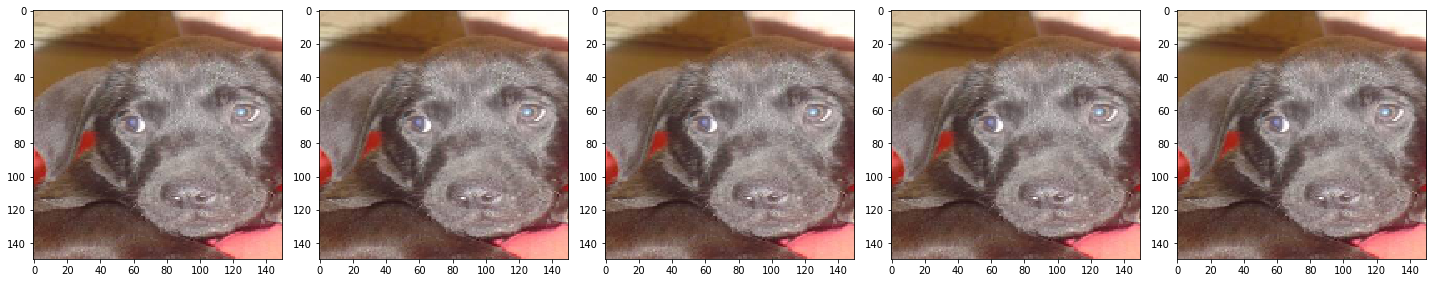

[0.8127683  0.18723175]
[9.4576368e-05 9.9990547e-01]
[0.2020016 0.7979983]
[0.8803434  0.11965663]
[0.2662378 0.7337622]


In [41]:
# plot the first 5 images in the validation data set
sample_validation_images = [val_data_gen[0][0][0] for i in range(5)]
plotImages(sample_validation_images)

for i in range(5):
    print(predictions[i])

In [26]:
print(tf.version.GIT_VERSION, tf.version.VERSION)

unknown 1.14.0


### OPTIONAL 1: show how to save the model as a "SavedModel" in Tensorflow --this is used for deployment to Google Cloud or MLEngine   BE CAREFUL --RUN ONLY ONE OF THE FOLLOWING BLOCKS

In [27]:
print(BASE_DIRECTORY)

C:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\


In [32]:
#TENSORFLOW 2.* VERSION (see next block for 1.14 atlernative)
#Save the entire model as a SavedModel.


#create directory to save the SavedModel
#setup directories
saved_model_dir1 = os.path.join(BASE_DIRECTORY, 'saved_model')
print(" path exists=" + str(os.path.exists(saved_model_dir1)))
if(os.path.exists(saved_model_dir1) == False):
    print(" creating" + str(saved_model_dir1))
    os.mkdir(saved_model_dir1)
    
saved_model_dir = os.path.join(BASE_DIRECTORY, 'saved_model\catsdogsCNN')    
if(os.path.exists(saved_model_dir) == False):
    print(" creating" + str(saved_model_dir))
    os.mkdir(saved_model_dir)
model.save(saved_model_dir)

 path exists=True


OSError: Unable to create file (unable to open file: name = 'C:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\saved_model\catsdogsCNN', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

In [34]:
#TENSORFLOW 1.14 this seems to work for tensorflow 1.14
print(saved_model_dir1)
tf.keras.experimental.export_saved_model(model, saved_model_dir1)

C:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\saved_model
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: None
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']
INFO:tensorflow

### OPTIONAL 2:  Shows how to load a model from a SavedModel

In [21]:
print("Loading model from saved model at: " + str(saved_model_dir))

new_modelw = tf.keras.models.load_model(saved_model_dir)

# Check its architecture
new_modelw.summary()

Loading model from saved model at: C:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\saved_model\catsdogsCNN
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         


### OPTIONAL 3 Launch Tensorboard

In [110]:
%load_ext tensorboard
print(mylog_dir)
#tensorboard --logdir=mylog_dir --host=local --port=6006
%tensorboard --logdir=mylog_dir --host=local

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
C:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\train_log


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
C:\Users\Lynne\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lynne\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lynne\AppData\Roaming\Python\Python37\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qin

invalid info file: 'C:\\Users\\Lynne\\AppData\\Local\\Temp\\.tensorboard-info\\pid-17932.info'
Traceback (most recent call last):
  File "C:\Users\Lynne\AppData\Roaming\Python\Python37\site-packages\tensorboard\manager.py", line 316, in get_all
    info = _info_from_string(contents)
  File "C:\Users\Lynne\AppData\Roaming\Python\Python37\site-packages\tensorboard\manager.py", line 155, in _info_from_string
    raise ValueError("incompatible version: %r" % (json_value,))
ValueError: incompatible version: {'cache_key': 'eyJhcmd1bWVudHMiOlsiLS1sb2dkaXI9QzpcXEdyZXdlXFxDbGFzc2VzXFxDUzY2M1xcTWF0XFxUZW5zb3JGbG93XFxjYXRzX2FuZF9kb2dzX2ZpbHRlcmVkXFx0cmFpbl9sb2dcXHRyYWluIl0sImNvbmZpZ3VyZV9rd2FyZ3MiOnt9LCJ3b3JraW5nX2RpcmVjdG9yeSI6IkM6XFxHcmV3ZVxcQ2xhc3Nlc1xcQ1M2NjNcXE1hdFxcVGVuc29yRmxvd1xcY2F0c19hbmRfZG9nc19maWx0ZXJlZCJ9', 'db': '', 'logdir': 'C:\\Grewe\\Classes\\CS663\\Mat\\TensorFlow\\cats_and_dogs_filtered\\train_log\\train', 'path_prefix': '', 'pid': 17932, 'port': 6006, 'start_time': 157344628

### OPTIONAL 4   try to perform prediciton on a single image


In [121]:
#function to load a single image
def loadAndSizeAndScaleImage(filename):
    print("loadAndSizeImage:  loading file " + str(filename))
    img = cv2.imread(filename)
    print(img)
    print("loadAndSizeImage: original size " + str(img.shape))
    #change size if needed
    newimg = cv2.resize(img,(IMG_SHAPE, IMG_SHAPE))
    print("loadAndSizeImage: new size " + str(newimg.shape))
    #now rescale the image as we are using ImageDataGenerator with rescale=1./255
    print("start resclae")
    newimg = np.array(newimg).astype('float32')/255
    print("loadAndSizeImage:  rescaling values /255")
    print(newimg)
    return newimg


In [122]:
# make prediction on a simgle image

#first load image
testImg = os.path.join(BASE_DIRECTORY, 'testingImages\dog.jpg')  
print("Loading " + str(testImg))
img = loadAndSizeAndScaleImage(testImg)
print("image shape is " + str(img.shape))
print(img)



#setup input tensor  of shape (batch=1, height, width, channels) = (1, 150,150,3)
tensor_input = np.expand_dims(img,axis=0)
print("tensor shape is " + str(tensor_input.shape))
print(tensor_input)


# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print('\n# Generate predictions ')
#predictions = model.predict_generator(val_data_gen, verbose=1 )
prediction = model.predict(tensor_input)
print(prediction)

Loading C:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\testingImages\dog.jpg
loadAndSizeImage:  loading file C:\Grewe\Classes\CS663\Mat\TensorFlow\cats_and_dogs_filtered\testingImages\dog.jpg
[[[ 48  53  44]
  [ 49  54  45]
  [ 51  56  47]
  ...
  [210 224 222]
  [221 234 232]
  [234 245 243]]

 [[ 48  53  44]
  [ 49  54  45]
  [ 51  56  47]
  ...
  [194 211 208]
  [203 216 214]
  [211 224 222]]

 [[ 49  54  45]
  [ 50  55  46]
  [ 52  57  48]
  ...
  [179 197 196]
  [186 200 199]
  [192 206 205]]

 ...

 [[ 16 103  69]
  [  5  92  58]
  [  0  81  47]
  ...
  [ 46 125  86]
  [ 25 104  65]
  [  8  87  48]]

 [[  6  93  59]
  [  9  96  62]
  [  5  91  57]
  ...
  [ 27 106  67]
  [ 15  94  55]
  [ 18  97  58]]

 [[ 10  96  62]
  [  9  95  61]
  [ 10  94  60]
  ...
  [ 18  97  58]
  [ 18  97  58]
  [ 29 108  69]]]
loadAndSizeImage: original size (191, 264, 3)
loadAndSizeImage: new size (150, 150, 3)
start resclae
loadAndSizeImage:  rescaling values /255
[[[0.1882353  0.207843